## Proceso de ETL y EDA

In [1]:
# Importamos las librerías necesarias

import pandas as pd
import numpy as np
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
%matplotlib inline
sns.set()

In [2]:
# Realizamos webscraping para obtener los símbolos de las acciones, junto con su sector, subsector y locación

URL = 'https://en.wikipedia.org/wiki/Nasdaq-100'

nasdaq_companies = pd.read_html(URL)[4][['Ticker', 'Company', 'GICS Sector', 'GICS Sub-Industry']]

# Renombramos las columnas
nasdaq_companies.rename(columns={'GICS Sector': 'Sector', 'GICS Sub-Industry': 'Sub-Industry' }, inplace=True)

In [3]:
# Creamos un nuevo dataframe el cual posee únicamente el sector 'Health Care'
nasdaq_companies_h = nasdaq_companies[nasdaq_companies.Sector == 'Health Care']
nasdaq_companies_h.head()

,Ticker,Company,Sector,Sub-Industry
4,ALGN,Align Technology,Health Care,Health Care Supplies
10,AMGN,Amgen,Health Care,Biotechnology
16,AZN,AstraZeneca,Health Care,Pharmaceuticals
20,BIIB,Biogen,Health Care,Biotechnology
36,DXCM,DexCom,Health Care,Health Care Equipment


In [4]:
# Creamos una lista con los symbols del dataframe antes creado
nasdaq_companies_h_symbols = nasdaq_companies_h.Ticker.tolist()

# Creamos un DataFrame vacío para almacenar los datos de cada compañía
nasdaq_h = pd.DataFrame()

# Iterarmos por el symbol de cada compañia y agregamos los datos al Dataframe creado
for ticke in nasdaq_companies_h_symbols:
    print(f"Descargando datos para {ticke}...")
    data = yf.download(ticke, start='2000-01-01')
    if len(data) > 0:
        data['Ticker'] = ticke
        nasdaq_h = pd.concat([nasdaq_h, data], axis=0)

Descargando datos para ALGN...
[*********************100%***********************]  1 of 1 completed
Descargando datos para AMGN...
[*********************100%***********************]  1 of 1 completed
Descargando datos para AZN...
[*********************100%***********************]  1 of 1 completed
Descargando datos para BIIB...
[*********************100%***********************]  1 of 1 completed
Descargando datos para DXCM...
[*********************100%***********************]  1 of 1 completed
Descargando datos para GILD...
[*********************100%***********************]  1 of 1 completed
Descargando datos para IDXX...
[*********************100%***********************]  1 of 1 completed
Descargando datos para ILMN...
[*********************100%***********************]  1 of 1 completed
Descargando datos para ISRG...
[*********************100%***********************]  1 of 1 completed
Descargando datos para MRNA...
[*********************100%***********************]  1 of 1 completed
D

In [5]:
# Analizamos el encabezado del dataframe
nasdaq_h.head(3)

,Open,High,Low,Close,Adj Close,Volume,Ticker
Date,,,,,,,
2001-01-30,18.125,18.1875,16.2500,16.8750,16.8750,812300,ALGN
2001-01-31,17.125,17.1875,13.4375,13.5000,13.5000,1212700,ALGN
2001-02-01,13.125,14.3750,13.0000,14.1875,14.1875,669100,ALGN


In [6]:
# Tamaño del dataframe
nasdaq_h.shape

(69093, 7)

In [7]:
# Analizamos la cantidad de registros: 69093, columnas:7, tipos de datos: float64(5), int64(1), object(1)
nasdaq_h.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 69093 entries, 2001-01-30 to 2023-03-28
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       69093 non-null  float64
 1   High       69093 non-null  float64
 2   Low        69093 non-null  float64
 3   Close      69093 non-null  float64
 4   Adj Close  69093 non-null  float64
 5   Volume     69093 non-null  int64  
 6   Ticker     69093 non-null  object 
dtypes: float64(5), int64(1), object(1)
memory usage: 4.2+ MB


In [8]:
# No se observan valores vacíos
nasdaq_h.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Ticker       0
dtype: int64

In [9]:
# Se observan 2 valores duplicados
nasdaq_h.duplicated().sum()

2

In [10]:
# Se eliminan los valores duplicados
nasdaq_h.drop_duplicates(inplace=True)

In [11]:
# Cambio los índices agregando a la fecha como una nueva columna
nasdaq_h= nasdaq_h.reset_index()

In [12]:
# Uno por el campo "Ticker" el daframe de las compañias con el recien generado
nasdaq_h = pd.merge(nasdaq_h, nasdaq_companies_h, on='Ticker')
nasdaq_h.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,Company,Sector,Sub-Industry
0,2001-01-30,18.1250,18.1875,16.2500,16.8750,16.8750,812300,ALGN,Align Technology,Health Care,Health Care Supplies
1,2001-01-31,17.1250,17.1875,13.4375,13.5000,13.5000,1212700,ALGN,Align Technology,Health Care,Health Care Supplies
2,2001-02-01,13.1250,14.3750,13.0000,14.1875,14.1875,669100,ALGN,Align Technology,Health Care,Health Care Supplies
3,2001-02-02,14.0000,14.5625,13.7500,14.1250,14.1250,775000,ALGN,Align Technology,Health Care,Health Care Supplies
4,2001-02-05,14.4375,14.5000,13.8750,14.1250,14.1250,489400,ALGN,Align Technology,Health Care,Health Care Supplies


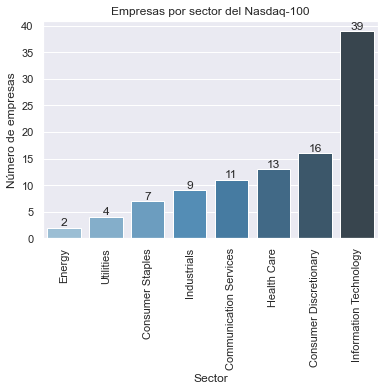

In [14]:
# Cantidad de empresas por sector

# Obtenemos el total de empresas por sector
companie_sector = nasdaq_companies.Sector.value_counts( ascending = True)

# Graficamos el total de empresas por sector
ax = sns.barplot(x=companie_sector.index, y=companie_sector.values, palette='Blues_d')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")

plt.title('Empresas por sector del Nasdaq-100')
plt.xlabel('Sector')
plt.ylabel('Número de empresas')

for i, v in enumerate(companie_sector.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
    
plt.show()


In [15]:
# Exportamos los datasets a formato .csv
nasdaq_h.to_csv('nasdaq_h.csv', index = False , header = True)